In [19]:
import cv2
import time

cam_port = 0
cam = cv2.VideoCapture(cam_port)
if not cam.isOpened():
    print("Error: Could not access the camera")
else:
    time.sleep(2)
    result, image = cam.read()
    
    if result:
        cv2.imshow("Captured Image", image)
        cv2.imwrite("captured_image.png", image)
        
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print("No image detected. Please try again.")
cam.release()


In [17]:
#capture the Image
import cv2
cam_port = 0
cam = cv2.VideoCapture(cam_port)

if not cam.isOpened():
    print("The Camera is Not Working")
else:
    result , image = cam.read()
    if result:
        filename = input("Enter  the name of image")
        cv2.imwrite(f"{filename}.png",image)
        resized_image = cv2.resize(image,(400,400))
        cv2.imshow("Resized Image",resized_image)
        print(f"image is saved as {filename}.png")
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print("No image detected")
        

cam.release()

Enter  the name of image M


image is saved as M.png


Epoch 1/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.3748 - loss: 1.0906 - val_accuracy: 0.4148 - val_loss: 1.0714
Epoch 2/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.4255 - loss: 1.0728 - val_accuracy: 0.5459 - val_loss: 1.0258
Epoch 3/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.4606 - loss: 1.0420 - val_accuracy: 0.5721 - val_loss: 0.9691
Epoch 4/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.4870 - loss: 1.0291 - val_accuracy: 0.5808 - val_loss: 0.9209
Epoch 5/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.5349 - loss: 0.9608 - val_accuracy: 0.5939 - val_loss: 0.9018
Epoch 6/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.5832 - loss: 0.9261 - val_accuracy: 0.6070 - val_loss: 0.8633
Epoch 7/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.6014 - loss: 0.8725 - val_accuracy: 0.6332 - val_loss: 0.8244
Epoch 8/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.6435 - loss: 0.8087 - val_accuracy: 0.6507 - v

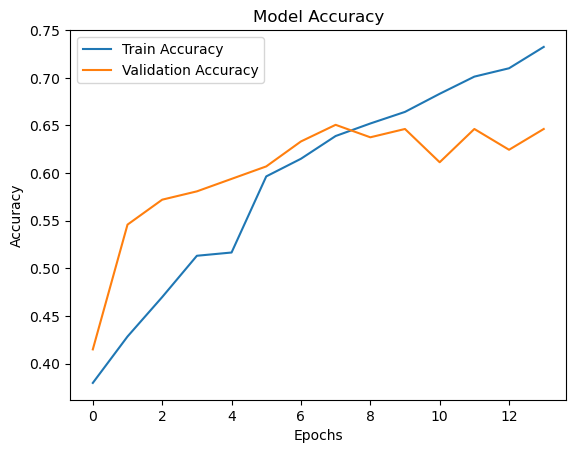

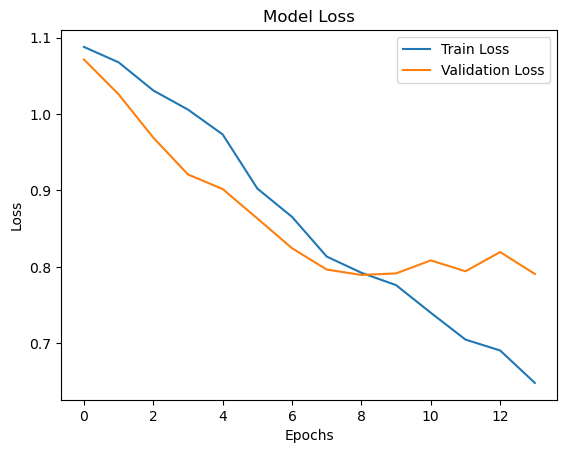

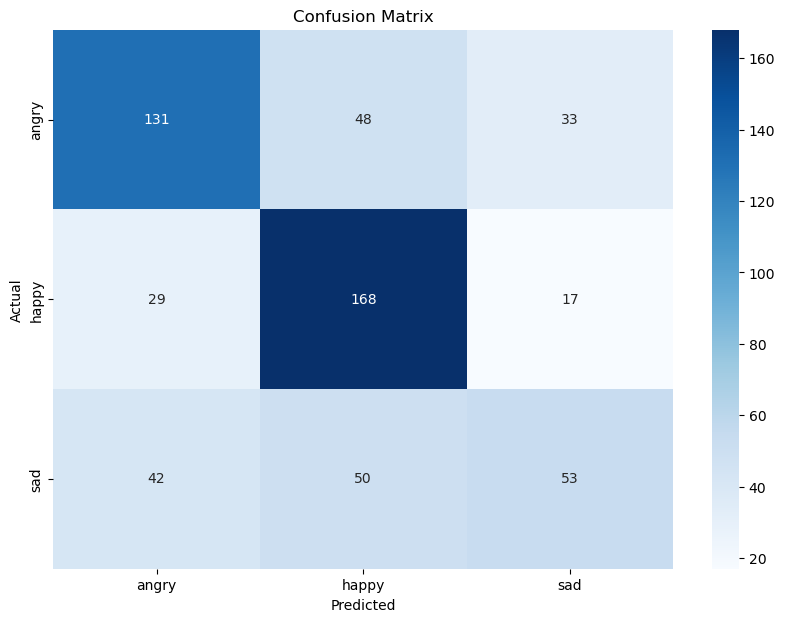

              precision    recall  f1-score   support

       angry       0.65      0.62      0.63       212
       happy       0.63      0.79      0.70       214
         sad       0.51      0.37      0.43       145

    accuracy                           0.62       571
   macro avg       0.60      0.59      0.59       571
weighted avg       0.61      0.62      0.61       571



In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import random
data_dir = r"C:\Users\Asus\OneDrive\Documents\Ip\EmotionsDS\EmotionsDS\EmotionsDataset\data"
emotion_folders = ['angry', 'happy', 'sad']
emotion_labels = {'angry': 0, 'happy': 1, 'sad': 2}

images = []
labels = []

for emotion in emotion_folders:
    folder_path = os.path.join(data_dir, emotion)
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (48, 48))
            images.append(img)
            labels.append(emotion_labels[emotion])

images = np.array(images).reshape(-1, 48, 48, 1) / 255.0
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

model = models.Sequential([
    layers.Input(shape=(48, 48, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=25, validation_split=0.1, batch_size=64, callbacks=[early_stopping])
model.save('emotion_detection_model.h5')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

y_pred = model.predict(X_test, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_folders, yticklabels=emotion_folders)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred_classes, target_names=emotion_folders))

def predict_emotion(image_path):
    model = tf.keras.models.load_model('emotion_detection_model.h5')

    if not model.compiled_metrics:
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (48, 48)).reshape(1, 48, 48, 1) / 255.0
    img_tensor = tf.convert_to_tensor(img, dtype=tf.float32)

    prediction = model(img_tensor, training=False).numpy()
    emotion = np.argmax(prediction)
    emotion_map = {0: 'Angry', 1: 'Happy', 2: 'Sad'}
    detected_emotion = emotion_map[emotion]

    if detected_emotion == 'Sad':
        jokes = ["Why don’t eggs tell jokes? They’d crack each other up!"]
        print(f"Detected Emotion: {detected_emotion}")
        print(f"Here’s a joke: {random.choice(jokes)}")
    elif detected_emotion == 'Happy':
        good_thoughts = [
            "Happiness is a journey, not a destination.",
            "The best way to predict the future is to create it."
        ]
        print(f"Detected Emotion: {detected_emotion}")
        print(f"Here’s a thought to keep your spirits high: {random.choice(good_thoughts)}")
    elif detected_emotion == 'Angry':
        print(f"Detected Emotion: {detected_emotion}")
        print("Take a deep breath and try to relax. Here’s a tip: Count to 10 and let it go.")



In [28]:
predict_emotion(r"C:\Users\Asus\OneDrive\Documents\Ip\EmotionsDS\EmotionsDS\EmotionsDataset\data\angry\38.jpg")


Detected Emotion: Angry
Take a deep breath and try to relax. Here’s a tip: Count to 10 and let it go.
